Dataset link for the project
https://www.kaggle.com/datasets/yasserh/titanic-dataset

## STEP 1. IMPORTS 


In [1]:
# for data manipulation 
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from sklearn.linear_model import LogisticRegression

# For metrics and helpful functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

### LOAD DATASETS

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

## STEP 2. DATA EXPLORATION (INITIAL EDA AND DATA CLEANING) 

In [3]:
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

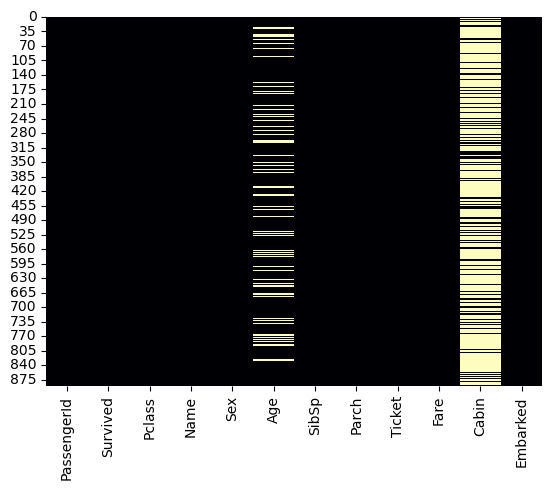

In [46]:
sns.heatmap(df.isna(),cbar=False,cmap='magma')

Roughly 20% of the data is missing and its just from 2 columns Age and Cabin from Age less data is missing as compared to cabin from cabin column very large amount of data is missing for future exploration we may address it effectively

In [47]:
# Compute the 25th percentile value in `tenure`
percentile25 = df['Pclass'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df['Pclass'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df[(df['Pclass'] > upper_limit) | (df['Pclass'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `Pclass`:", len(outliers))

Lower limit: 0.5
Upper limit: 4.5
Number of rows in the data containing outliers in `Pclass`: 0


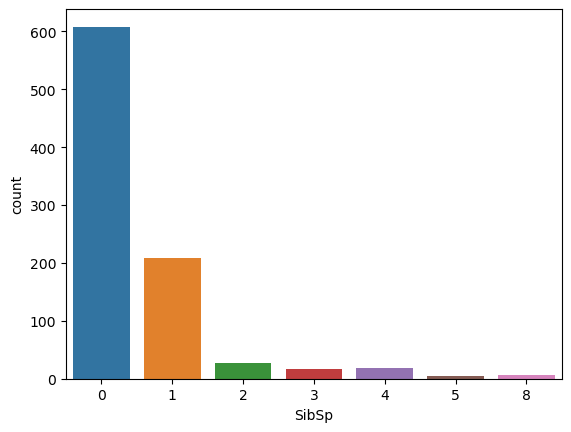

In [48]:
sns.countplot(data=df,x='SibSp');

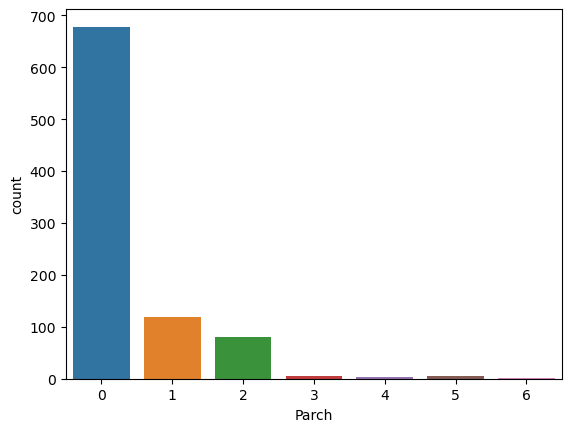

In [49]:
sns.countplot(data=df,x='Parch');

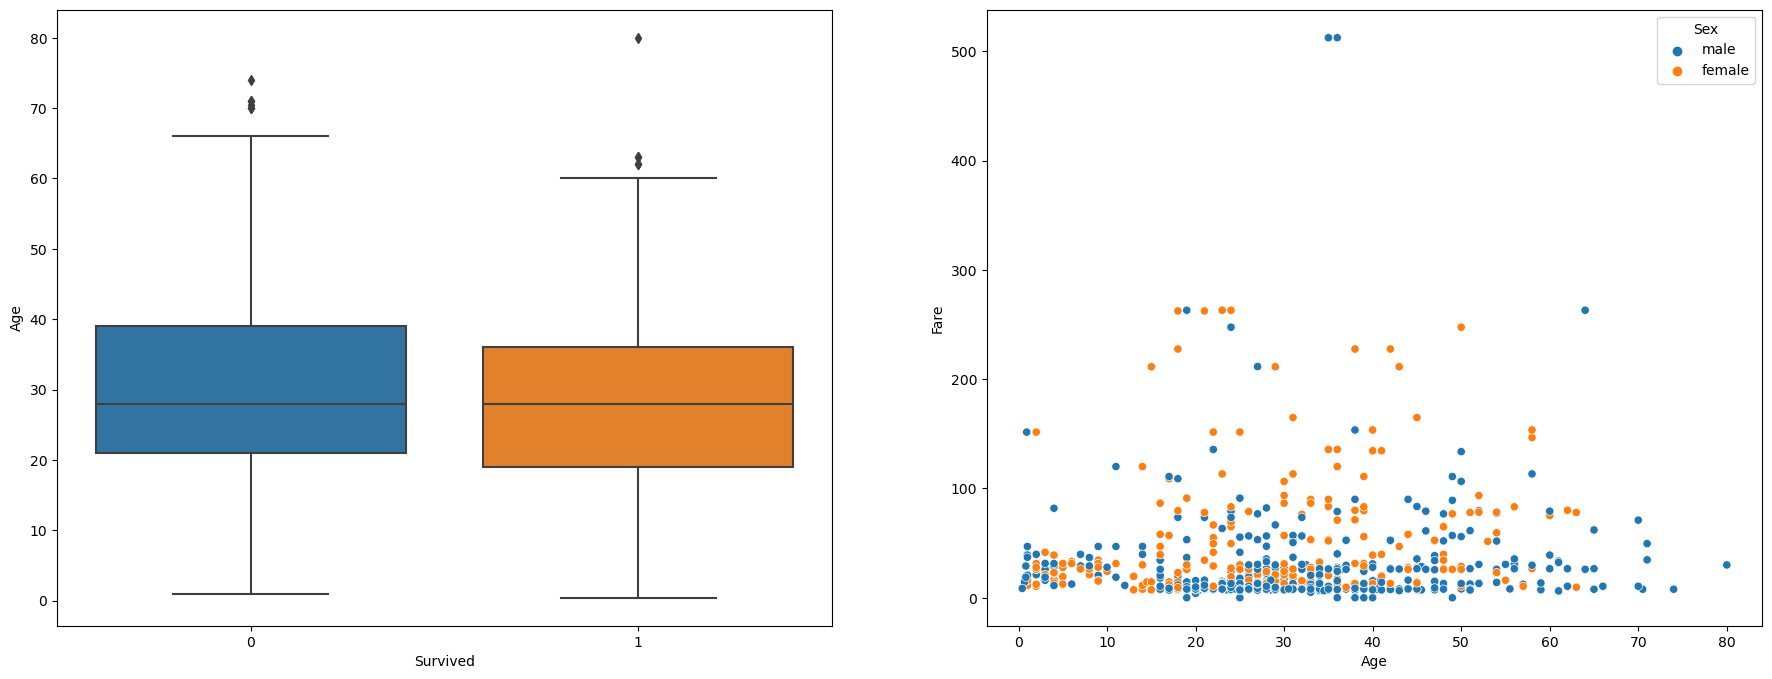

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data = df,x="Survived", y="Age",ax=ax[0])
sns.scatterplot(data=df,x="Age", y="Fare", hue="Sex",ax=ax[1])
plt.show()

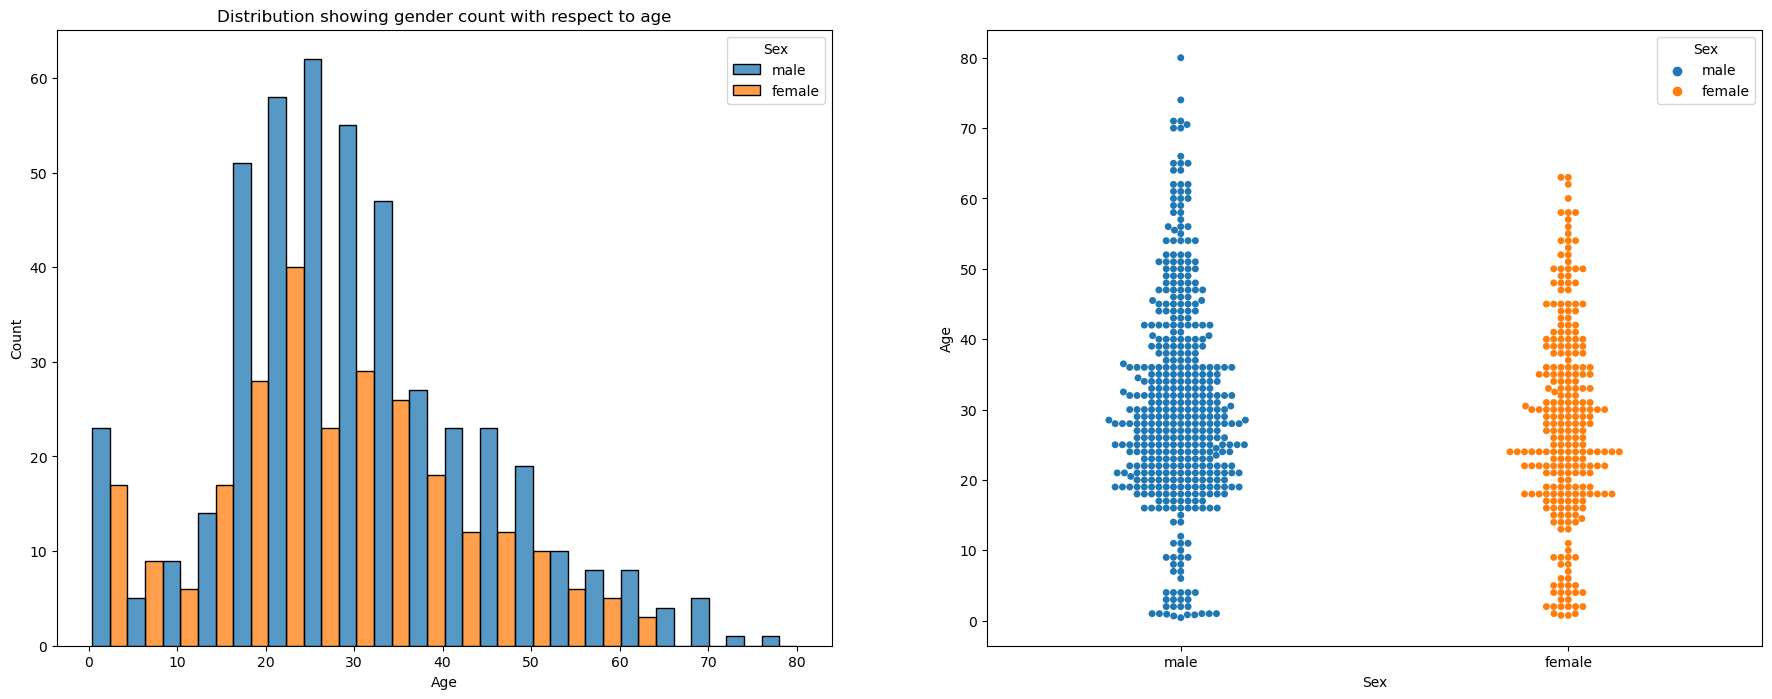

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.histplot(data = df, x='Age',hue='Sex', multiple='dodge',ax = ax[0])
ax[0].set_title("Distribution showing gender count with respect to age")
sns.swarmplot(data =df,x="Sex", y="Age",hue='Sex', ax=ax[1])
plt.show();

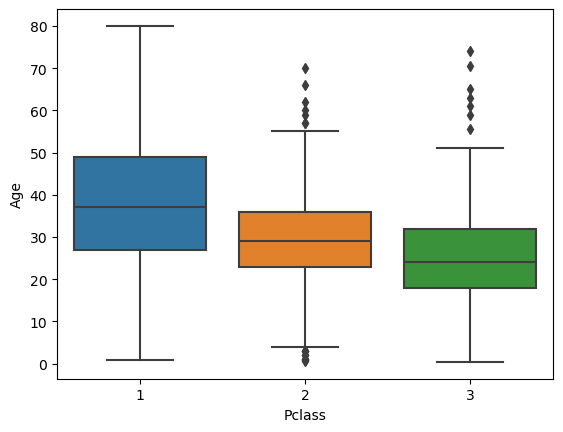

In [52]:
sns.boxplot(data = df,x="Pclass", y="Age");

Here we can understand that the average of the ages as per Pclass is 37,29,24 respectively so i think we must fill the nan values of age based ont he average we got 

In [53]:
def Assign_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age       


apply the above function

In [54]:
df['Age'] = df[['Age','Pclass']].apply(Assign_age,axis=1)

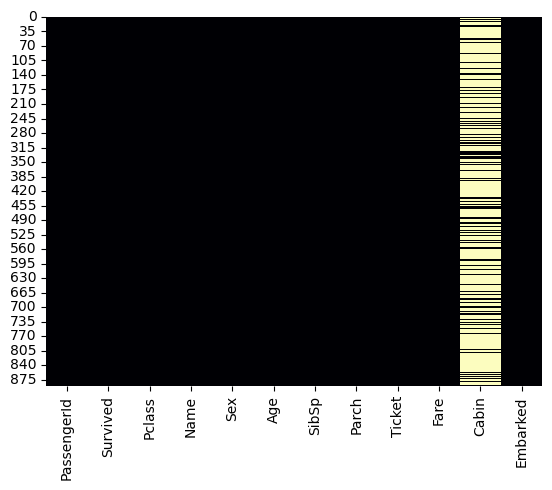

In [55]:
sns.heatmap(df.isna(),cbar=False,cmap='magma');

Here we successfully converted nan values of age 

In [56]:
survival_rates = df.groupby('Embarked')['Survived'].value_counts()
survival_rates

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

In [57]:
survival_rates = df.groupby('Embarked')['Survived'].mean()
survival_rates

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

### Cherbourg (C):

93 passengers survived

75 passengers did not survive

survival_rates :55.3571 


### Queenstown (Q):

30 passengers survived

47 passengers did not survive

survival_rates :38.9610


### Southampton (S):

217 passengers survived

427 passengers did not survive

survival_rates :33.6957

In [58]:
df_enc = df.copy()
df_enc = df_enc.drop(columns = ['PassengerId','Name','Ticket','Cabin'])
df_enc['Sex'] =df_enc['Sex'].replace({"male":1,'female':0}) 

In [59]:
df_enc.shape

(891, 8)

In [60]:
df_enc = df_enc.dropna()

In [61]:
df_enc.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [62]:
# df_enc = pd.get_dummies(df_enc,drop_first=True,dtype =int)
df_enc['Embarked']=df_enc['Embarked'].replace({'S':1,'C':2,'Q':3})

In [63]:
df_enc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


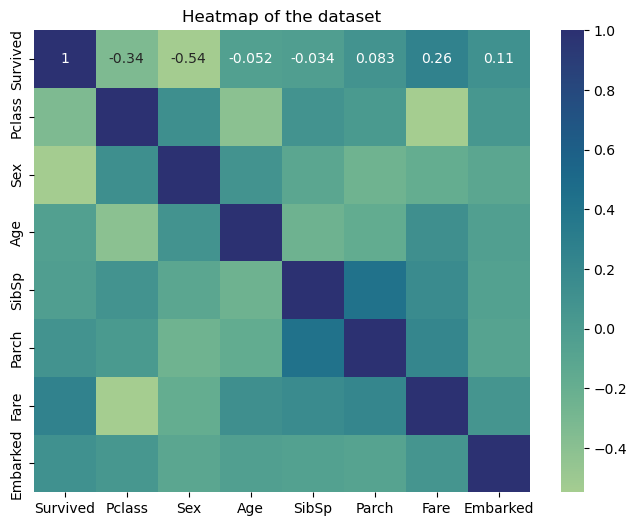

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc.corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

## Step 3. Model Building, Step 4. Results and Evaluation

In [65]:
# Now lets apply Logistic Regression

In [66]:
df_logreg = df_enc[(df_enc['Pclass'] >= lower_limit) & (df_enc['Pclass'] <= upper_limit)]

In [67]:
# Isolate the outcome variable
y = df_logreg['Survived']

# Display first few rows of the outcome variable
y.head() 

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [68]:
# Select the features you want to use in your model
X = df_logreg.drop('Survived', axis=1)

# Display the first few rows of the selected features 
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1


In [69]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [70]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [71]:
log_clf.score(X_train,y_train)

0.8093093093093093

In [72]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

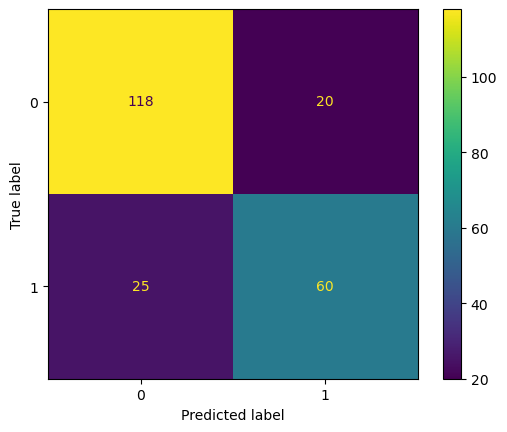

In [73]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       138
           1       0.75      0.71      0.73        85

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



The classification report above shows that the logistic regression model achieved a precision of 80%, recall of 80%, f1-score of 80% (all weighted averages), and accuracy of 80%. However, if it's most important to predict passengers who did not survive, then the scores are significantly lower.